In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
!pip install kaggle

In [59]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [60]:
!ls

'{'	 fruits-360	       PetImages        sample_data
 drive	'MSR-LA - 3467.docx'  'readme[1].txt'


In [61]:
import json
token ={"username":"akkinasrikar","key":"b997ebdcc23ad29e3a68ca90b4e5de7e"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [62]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [63]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [64]:
!chmod 600 /root/.kaggle/kaggle.json

In [65]:
!kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
nehaprabhavalkar/indian-food-101                                  Indian Food 101                                        7KB  2020-09-30 06:23:43           4105  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08           1016  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           4750  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           2786  
balraj98/stanford-back

In [66]:
!kaggle datasets download -d moltean/fruits

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [67]:
!unzip '/content/{/content}/datasets/moltean/fruits/fruits.zip'

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360/Training/Tomato 3/129_100.jpg

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import imread
import seaborn as sns
from PIL import Image
style.use("fivethirtyeight")
import os
import random

In [79]:
fruits="/content/fruits-360"

In [80]:
os.listdir(fruits)

['test-multiple_fruits', 'Test', 'readme.md', 'papers', 'LICENSE', 'Training']

In [81]:
train_path=fruits+"/Training/"
test_path=fruits+"/Test/"

In [82]:
print(f"no of classes {len(os.listdir(train_path))}")
print(os.listdir(train_path))

no of classes 131
['Pineapple Mini', 'Dates', 'Lemon Meyer', 'Kiwi', 'Kumquats', 'Apple Golden 1', 'Ginger Root', 'Tangelo', 'Cherry Rainier', 'Nut Forest', 'Apple Crimson Snow', 'Limes', 'Physalis with Husk', 'Pear Forelle', 'Nectarine', 'Mango Red', 'Apple Braeburn', 'Apricot', 'Clementine', 'Potato White', 'Walnut', 'Pear Abate', 'Papaya', 'Avocado ripe', 'Apple Red Yellow 2', 'Apple Red Delicious', 'Redcurrant', 'Pear', 'Granadilla', 'Pear Monster', 'Corn Husk', 'Cherry Wax Yellow', 'Apple Red 3', 'Grape White', 'Tomato 4', 'Pomelo Sweetie', 'Fig', 'Mangostan', 'Cherry 2', 'Apple Pink Lady', 'Banana', 'Nectarine Flat', 'Onion White', 'Apple Golden 3', 'Apple Granny Smith', 'Tomato Cherry Red', 'Pear Red', 'Cherry Wax Red', 'Potato Red Washed', 'Onion Red Peeled', 'Tomato not Ripened', 'Lychee', 'Blueberry', 'Corn', 'Pitahaya Red', 'Huckleberry', 'Mango', 'Kaki', 'Peach Flat', 'Pepper Red', 'Mandarine', 'Banana Lady Finger', 'Pepino', 'Physalis', 'Carambula', 'Melon Piel de Sapo', '

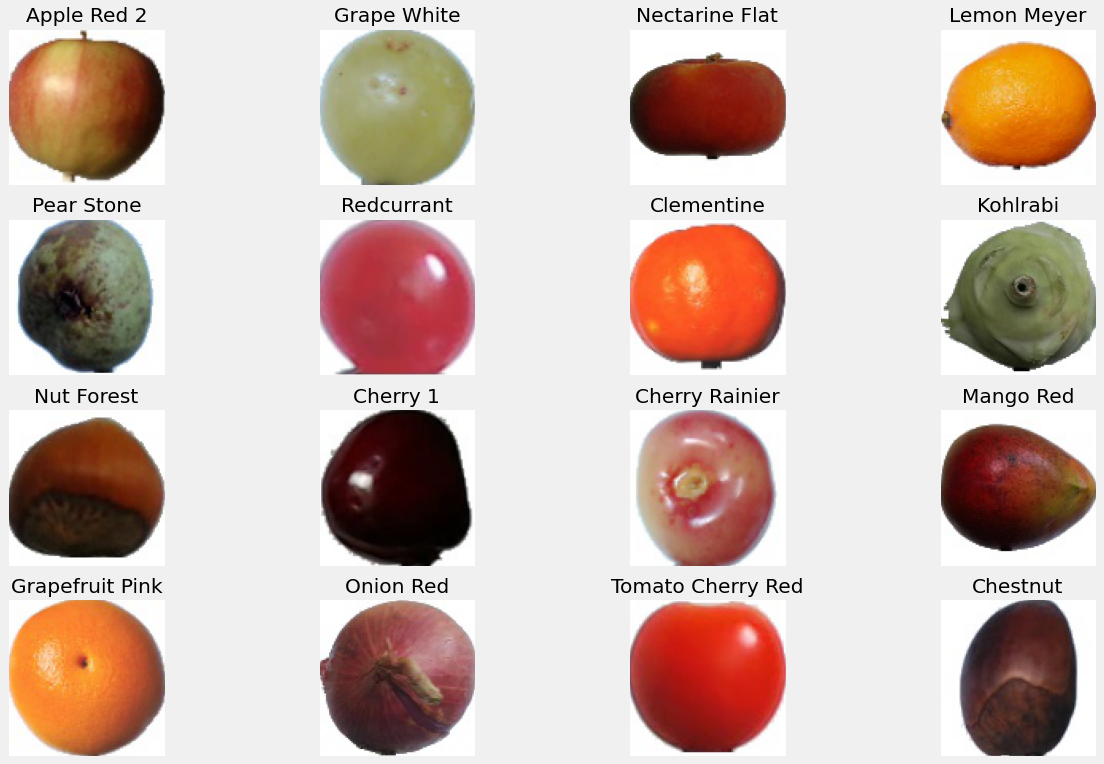

In [85]:
plt.figure(figsize=(19,12.5))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    rn=random.randint(0,130)
    ri=random.randint(0,10)
    fruitname=os.listdir(train_path)[rn]
    imgpath=train_path+fruitname+"/"
    imgpath=imgpath+os.listdir(imgpath)[ri]
    plt.imshow(imread(imgpath))
    plt.title(fruitname)
plt.show()

In [86]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

In [87]:
def load_image(img_path):
    img=image.load_img(img_path,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    return img

In [88]:
def get_predictions(model):
    plt.figure(figsize=(26,5))
    for i in range(1,5):
        plt.subplot(1,5,i)
        plt.grid(False)
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        plt.imshow(Image.open(images[i-1]).resize((200,200),Image.ANTIALIAS))
    plt.figure(figsize=(32,5))
    for i,imgpath in enumerate(images):
        image=load_image(imgpath)
        pred=decode_predictions(model.predict(image),top=3)[0]
        plt.subplot(1,5,i+1)
        plt.grid(False)
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        sns.barplot(x=[j[2] for j in pred],y=[j[1] for j in pred],color="gray")
    plt.show()
    

In [93]:
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16

In [94]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(test_path + '/*/*.jp*g')

In [95]:
image_size=[100,100]
batch_size=32
epochs=5
folders = glob(train_path + '/*')
vgg16=VGG16(input_shape=image_size+[3],weights="imagenet",include_top=False)

In [96]:
for layer in vgg16.layers:
    layer.trainable=False
    
x=Flatten()(vgg16.output)
x=Dense(1000,activation='relu')(x)
prediction=Dense(len(folders),activation='softmax')(x)

In [97]:
model=Model(inputs=vgg16.input,outputs=prediction)

In [98]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [99]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [100]:
genarator=ImageDataGenerator( rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              preprocessing_function=preprocess_input)

In [101]:
test_gen=genarator.flow_from_directory(test_path,target_size=image_size)
print(test_gen.class_indices)

Found 22688 images belonging to 131 classes.
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape Wh

In [102]:
labels=[None]*len(test_gen.class_indices)
for k,v in test_gen.class_indices.items():
    labels[v]=k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -100.92142 max: 151.061


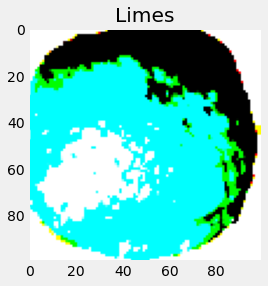

In [103]:
for x,y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.grid(False)
    plt.imshow(x[0])
    plt.show()
    break   

In [105]:
train_genarator=genarator.flow_from_directory(train_path,
                                              target_size=image_size,
                                              shuffle=True,
                                              batch_size=batch_size)

Found 67692 images belonging to 131 classes.


In [106]:
validation_genarator=genarator.flow_from_directory(test_path,
                                              target_size=image_size,
                                              shuffle=False,
                                              batch_size=batch_size)

Found 22688 images belonging to 131 classes.


In [108]:
results=model.fit_generator(train_genarator,
                           validation_data=validation_genarator,
                           epochs=epochs,
                           steps_per_epoch=len(image_files)//batch_size,
                           validation_steps=len(valid_image_files)//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
2115/2115 [==============================] - 257s 121ms/step - loss: 0.9665 - accuracy: 0.8647 - val_loss: 0.8918 - val_accuracy: 0.8785
Epoch 2/5
2115/2115 [==============================] - 256s 121ms/step - loss: 0.4173 - accuracy: 0.9396 - val_loss: 1.2206 - val_accuracy: 0.8953
Epoch 3/5
2115/2115 [==============================] - 255s 121ms/step - loss: 0.3559 - accuracy: 0.9583 - val_loss: 1.4277 - val_accuracy: 0.9084
Epoch 4/5
2115/2115 [==============================] - 256s 121ms/step - loss: 0.3439 - accuracy: 0.9675 - val_loss: 1.8272 - val_accuracy: 0.9156
Epoch 5/5
2115/2115 [==============================] - 255s 121ms/step - loss: 0.3244 - accuracy: 0.9725 - val_loss: 1.9057 - val_accuracy: 0.9209


In [109]:
from tensorflow.keras.models import model_from_json

In [110]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [111]:
json_file=open("model.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

In [112]:
loaded_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [113]:
loaded_model.evaluate_generator(validation_genarator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[1.9251720905303955, 0.9203103184700012]

In [114]:
loaded_model.metrics_names

['loss', 'accuracy']

In [115]:
import pandas as pd
loss=pd.DataFrame(model.history.history)

<Figure size 720x432 with 0 Axes>

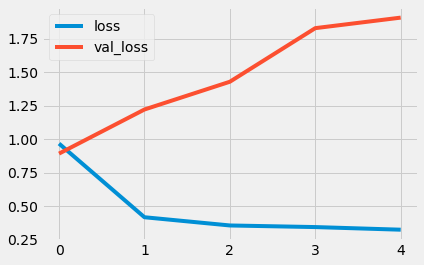

In [116]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

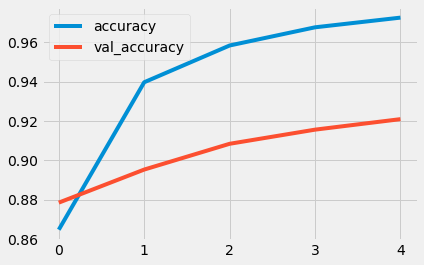

In [117]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [118]:
y_pred=loaded_model.predict(validation_genarator)

In [119]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [120]:
from sklearn.metrics import confusion_matrix,classification_report

In [121]:
print(confusion_matrix(validation_genarator.classes,y_pred_classes))
print(classification_report(validation_genarator.classes,y_pred_classes))

[[155   0   0 ...   0   0   0]
 [  9 123   0 ...   0   0   0]
 [  0   0 145 ...   0   0   0]
 ...
 [  0   0   0 ... 157   0   0]
 [  0   0   0 ...   0 241   0]
 [  0   0   0 ...   0   0 155]]
              precision    recall  f1-score   support

           0       0.61      0.95      0.74       164
           1       0.65      0.83      0.73       148
           2       1.00      0.91      0.95       160
           3       0.86      0.95      0.90       164
           4       0.92      0.63      0.75       161
           5       0.95      0.81      0.88       164
           6       0.72      0.88      0.79       152
           7       0.90      0.70      0.78       164
           8       0.78      0.87      0.82       164
           9       0.76      0.83      0.80       144
          10       0.95      0.98      0.96       166
          11       0.94      0.92      0.93       164
          12       1.00      1.00      1.00       219
          13       0.94      0.98      0.96       1